In [21]:
from pathlib import Path
import pandas as pd

FILENAME = "mlb_team_stats.csv"

def find_file(filename: str, start: Path = None, max_up=4) -> Path | None:
    """Search current dir, then parents (up to max_up), then all subfolders."""
    start = Path.cwd() if start is None else Path(start)

    if (start/filename).exists():
        return start/filename
    
    for p in ["data", "datasets", "input", "inputs"]:
        cand = start/p/filename
        if cand.exists():
            return cand
   
    for up in range(max_up+1):
        base = start.parents[up] if up < len(start.parents) else start
      
        for p in ["data", "datasets", "input", "inputs", "nfl_fantasy_points/data"]:
            cand = base/p/filename
            if cand.exists():
                return cand
    
        for cand in base.rglob(filename):
            return cand
    return None

path = find_file(FILENAME)
print("Found:" if path else "Not found.", path)

if path is None:
    raise FileNotFoundError(
        "Could not locate mlb_team_stats.csv. "
        "If you know the exact path, set it below: "
        r'path = Path(r"C:\full\path\to\mlb_team_stats.csv")'
    )

df = pd.read_csv(path)
print("Loaded shape:", df.shape)
df.head()



Found: C:\Users\yshah\Downloads\mlb_team_stats.csv
Loaded shape: (32, 29)


,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,65,27.8,4.88,162,6210,5480,791,1377,277,...,0.433,0.757,108,2372,109,81,37,64,21,1112
1,Athletics,58,26.1,4.52,162,6151,5547,733,1403,296,...,0.431,0.749,106,2388,117,44,18,35,14,1106
2,Atlanta Braves,71,28.3,4.47,162,6186,5508,724,1349,243,...,0.399,0.720,102,2200,98,51,15,36,14,1160
3,Baltimore Orioles,70,26.5,4.18,162,6020,5416,677,1273,251,...,0.394,0.699,96,2135,102,75,4,41,14,1044
4,Boston Red Sox,56,27.6,4.85,162,6206,5562,786,1414,324,...,0.421,0.745,106,2344,99,72,13,41,24,1125


In [15]:
# --------------------------------------------------------------
# Which teams scored the most total runs?
# --------------------------------------------------------------
top_runs = df.nlargest(5, 'R')[['Tm', 'R']]
top_runs


,Tm,R
31,NaN,21614
19,New York Yankees,849
14,Los Angeles Dodgers,825
16,Milwaukee Brewers,806
28,Toronto Blue Jays,798


In [16]:
# --------------------------------------------------------------
# Which team had the highest OPS (On-base + Slugging)?
# --------------------------------------------------------------
best_ops = df.loc[df['OPS'].idxmax(), ['Tm', 'OPS']]
best_ops


Tm     New York Yankees
OPS               0.787
Name: 19, dtype: object

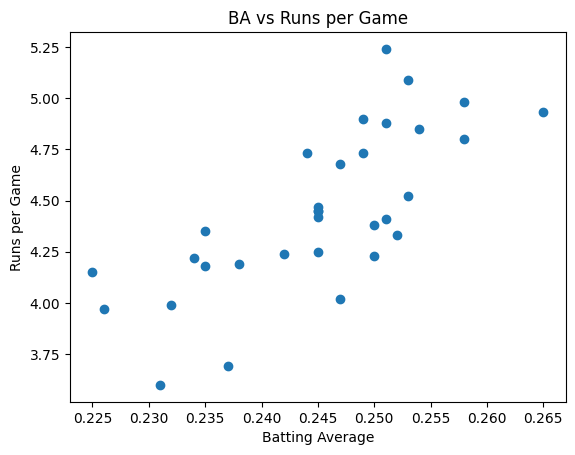

,BA,R/G
BA,1.000000,0.738631
R/G,0.738631,1.000000


In [17]:
# --------------------------------------------------------------
# 4️⃣ Relationship between Batting Average and Runs per Game
# --------------------------------------------------------------
import matplotlib.pyplot as plt

plt.scatter(df['BA'], df['R/G'])
plt.xlabel('Batting Average')
plt.ylabel('Runs per Game')
plt.title('BA vs Runs per Game')
plt.show()

df[['BA', 'R/G']].corr()


In [18]:
# --------------------------------------------------------------
# Most disciplined teams (Walks per Strikeout ratio)
# --------------------------------------------------------------
df['BB_SO_ratio'] = df['BB'] / df['SO']
df.nlargest(5, 'BB_SO_ratio')[['Tm', 'BB_SO_ratio']]


,Tm,BB_SO_ratio
28,Toronto Blue Jays,0.473157
16,Milwaukee Brewers,0.445498
22,San Diego Padres,0.439276
19,New York Yankees,0.436774
5,Chicago Cubs,0.433829


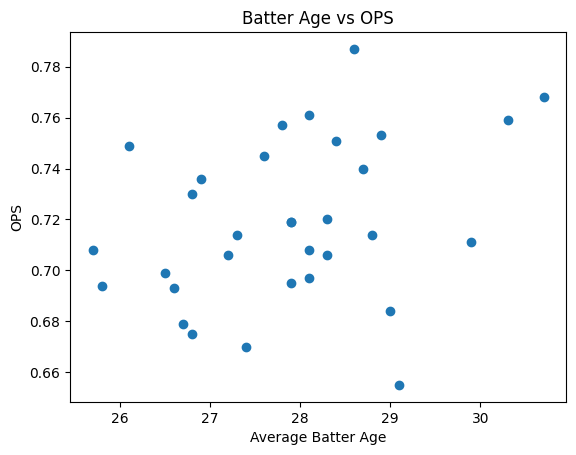

,BatAge,OPS
BatAge,1.000000,0.321779
OPS,0.321779,1.000000


In [19]:
# --------------------------------------------------------------
# Relationship between team age and offensive strength
# --------------------------------------------------------------
plt.scatter(df['BatAge'], df['OPS'])
plt.xlabel('Average Batter Age')
plt.ylabel('OPS')
plt.title('Batter Age vs OPS')
plt.show()

df[['BatAge', 'OPS']].corr()


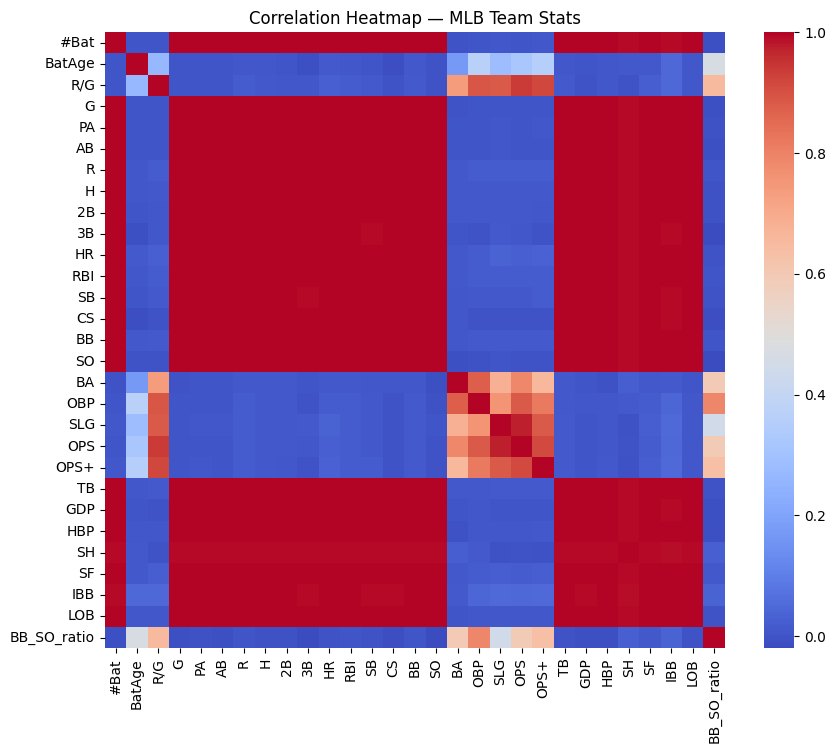

In [20]:
# --------------------------------------------------------------
# Correlation Heatmap — offensive variables
# --------------------------------------------------------------
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('number').corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap — MLB Team Stats')
plt.show()
